0.0100000000000000
h0 = 4.91
v = -9.81
(4.68, 'm/s (velocidad de la masa hacia arriba)\n')
(0.61, 'kg (masa puntual)\n')
EI = 525
m = 1.11
wd = 13.25
wn = 13.32
q0 = -0.09
q0p = -5


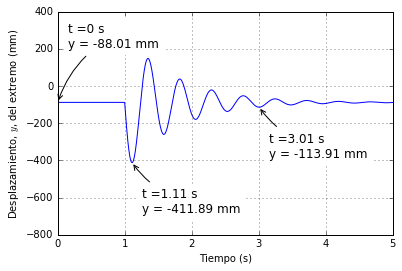

In [10]:
from sympy import *
from sys import exit
import numpy as np
from matplotlib import pyplot as plt
init_printing(True)

Pi = pi.evalf()
redn = lambda x: round(x,2)
rad2deg = lambda x: x*180/Pi
deg2rad = lambda x: x*Pi/180.

def show(x):
	str = x+" = %g"%(redn(eval(x)))
	print(str)


		 
ro = 7850.0
b = 30.0e-3
h = 10.0e-3

x, L = symbols('x, L')
phi = (x/L)*(x/L)*(3-x/L)/2
phix = diff(phi,x)
phixx = diff(phix,x)

f1 = integrate(phi*phi,(x,0,L))/L
f2 = integrate(phi,(x,0,L))/L
f3 = integrate(phixx*phixx,(x,0,L))*(L**3)

L = 2.0
g = 9.81

m = b*h*(L*f1.evalf())*ro
EI = (210.0e9)*h*h*h*b/12
xi = 0.1

k = (f3.evalf())*EI/(L**3)
wn = sqrt(k/m)
wd = wn*sqrt(1-xi**2)

q0 = - g*ro*b*h*L*(f2.evalf())/k
q0p = -5.0

# comprobar resultado

y = symbols('y')

sol = solve(f2*g*ro*(L**4)/(f3*(210.0e9)*(y**2)/12)-abs(q0),y)

print(sol[1])

h0 = g/2

show('h0')

v = -g*1.0

show('v')

phi_c = (1.5/2)*(1.5/2)*(3-1.5/2)/2.
sol = solve(0.8+(y-phi_c*q0p)/(v),y)
v2 = sol[0]

print(redn(v2), 'm/s (velocidad de la masa hacia arriba)\n')

sol = solve(m*q0p+phi_c*y*(v2-v),y)

m0 = sol[0]
print(redn(m0), 'kg (masa puntual)\n')


show('EI'), show('m')
show('wd'), show('wn')
show('q0'),show('q0p')

t0 = 1.0
y = []
t = np.linspace(0,5,1000,endpoint=True)
for tj in t:
	if tj<=t0:
		y.append(q0)
	else:
		res = q0 + exp(-xi*wn*(tj-t0))*(q0p/wd)*sin(wd*(tj-t0))
		y.append(res)
y = np.array(y)


%matplotlib inline

fid = plt.figure(1)

plt.plot(t,y*1000)
plt.grid(True)
plt.xlabel('Tiempo (s)')
plt.ylabel('Desplazamiento, $y$, del extremo (mm)')
plt.ylim((-800,400))
t1 = (atan(wd/(xi*wn))+0*Pi)/wd + 1
res1 = 1000*(q0 + exp(-xi*wn*(t1-t0))*(q0p/wd)*sin(wd*(t1-t0)))
t4 = (atan(wd/(xi*wn))+8*Pi)/wd + 1
res4 = 1000*(q0 + exp(-xi*wn*(t4-t0))*(q0p/wd)*sin(wd*(t4-t0)))

plt.annotate('t =%g s\ny = %g mm'%(redn(t1),redn(res1)) ,
xy=(t1, res1), xycoords='data',
xytext=(+10, -50), textcoords='offset points', fontsize=12,
arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"),backgroundcolor='w')

plt.annotate('t =%g s\ny = %g mm'%(redn(t4),redn(res4)) ,
xy=(t4, res4), xycoords='data',
xytext=(+10, -50), textcoords='offset points', fontsize=12,
arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"),backgroundcolor='w')

plt.annotate('t =%g s\ny = %g mm'%(redn(0.0),redn(q0*1000)) ,
xy=(0, q0*1000), xycoords='data',
xytext=(+10,55), textcoords='offset points', fontsize=12,
arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),backgroundcolor='w')
plt.show()
fid.savefig('ex04092019data.pdf',bbox_inches='tight')
